# Structure from Motion

In [214]:
import image_registration as ir
import bundle_adjustment as ba
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load and Display Images

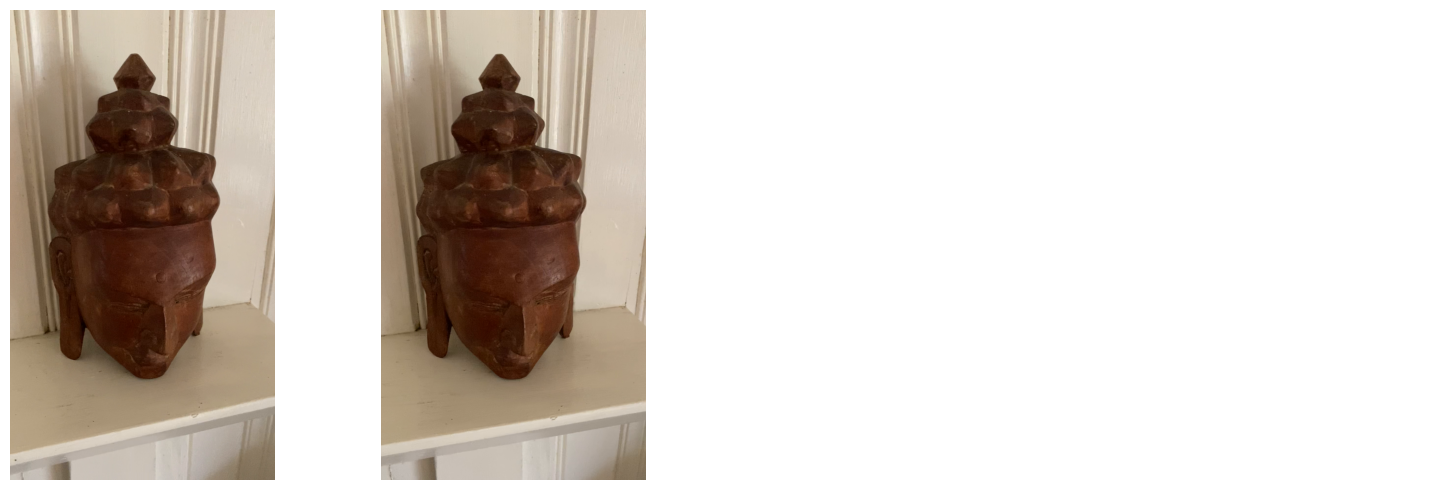

In [215]:
max_reprojection_error = 5.0
image_directories = ["buddha_images_2"]
image_registration = ir.ImageRegistration(
    image_directories,
    sift_contrastThreshold=0.035,
    sift_nOctaveLayers=5,
    sift_edgeThreshold=10.0,
    sift_sigma=1.6,
    visualize_features=False,
    visualize_epipolar_lines=False,
    ransac_reproj_thres = max_reprojection_error)
%matplotlib inline
image_registration.get_images_for_registration()

## Feature Detection Using SIFT

In [216]:
image_registration.get_features()

## Compute Fundamental and Essential Matrices

In [217]:

image_registration.process_epipolar_geometry_and_recover_relative_poses()

In [218]:
image_registration.compute_camera_extrinsics()
%matplotlib tk
image_registration.plot_camera_poses()

## Triangulate the landmarks

In [219]:
image_registration.triangulate_landmarks_all_views()
print(image_registration.world_points_3D[0].shape)
ir.ImageRegistration.plot_points_3d(image_registration.world_points_3D)

(4, 139)


## Bundle Adjustment

In [220]:
# Initialize object
gtsam_ba = ba.GTSAMBundleAdjustment(image_registration_object=image_registration)
gtsam_ba.define_factor_noises()

# Build graph
gtsam_ba.build_graph()

gtsam_ba.optimize_graph()

gtsam_ba.extract_landmarks_to_array()

ir.ImageRegistration.plot_points_3d(gtsam_ba.landmarks_list)